In [1]:
# GITHUB URL - https://github.com/BeeryeIRE/UCDPA_brianconnolly

# In this part of the project, I will import data from flat files and use this data to investigate and visualise 
# the relationships between: 

# (i) NHL players' physical characteristics and position
# (ii) NHL players physical characteristics and the physicality of their play
# (iii) NHL shot types, locations and outcomes

# Thereafter, I will apply linear and logistic regression models to the NHL shots dataset, before finally implementing a Random
# Forest machine learning model against the same dataset to attempt to predict shot types based on continuous and categorical
# variables.

In [2]:
# Importing the necessary packages for this project

In [3]:
# Import numpy and pandas for data analyis
import numpy as np
import pandas as pd

In [4]:
# Import matplotlib and seaborn for data visualisation
import matplotlib as plt
import matplotlib.image as mpimg
rink_img = mpimg.imread('https://raw.githubusercontent.com/BeeryeIRE/UCDPA_brianconnolly/main/hockey_rink.png') # this is an image background for shot charts
import seaborn as sns

In [5]:
# Import statsmodels and math to execute regressions
import statsmodels.formula.api as smf
import math

In [6]:
# Import scikit-learn for machine learning model
import sklearn.ensemble as sken
import sklearn.linear_model as sklm
import sklearn.model_selection as skms

In [7]:
pd.options.mode.chained_assignment = None # I am surpressing this warning as it is giving false positives in this notebook.

In [8]:
# PLAYER INFORMATION - HEIGHT, WEIGHT & POSITION
# As my first port of call, I will investigate the relationships between player height, weight and position.

# I will begin by loading a player info file sourced from (https://moneypuck.com/data.htm)

playerinf = pd.read_csv('https://raw.githubusercontent.com/BeeryeIRE/UCDPA_brianconnolly/main/allPlayersLookup.csv') # reading the csv from my Github
playerinf.dropna(inplace = True)
playerinf.sample(15)

,playerId,name,position,team,birthDate,weight,height,nationality,shootsCatches,primaryNumber,primaryPosition
1560,8470039,Tomas Fleischmann,L,CHI,5/16/1984,192.0,73.0,CZE,L,12.0,L
2238,8476343,Garret Sparks,G,LAK,6/28/1993,201.0,75.0,USA,L,40.0,G
1081,8467502,Ales Kotalik,R,CGY,12/23/1978,225.0,73.0,CZE,R,12.0,R
2313,8476279,Jyrki Jokipakka,D,OTT,8/20/1991,215.0,75.0,FIN,L,23.0,D
2502,8474135,Brett Bellemore,D,CAR,6/25/1988,225.0,76.0,CAN,R,73.0,D
2600,8468568,Kurt Sauer,D,ARI,1/16/1981,222.0,76.0,USA,L,44.0,D
1009,8473466,Ryan White,C,MIN,3/17/1988,200.0,72.0,CAN,R,21.0,C
180,8470584,Wade Dubielewicz,G,MIN,1/30/1979,185.0,70.0,CAN,L,31.0,G
457,8478063,Shane Gersich,L,WSH,7/10/1996,175.0,71.0,USA,L,63.0,L
1381,8470780,Mark Flood,D,WPG,9/29/1984,195.0,73.0,CAN,R,33.0,D


Text(0.5, 0.98, 'Player Height / Weight Distribution')

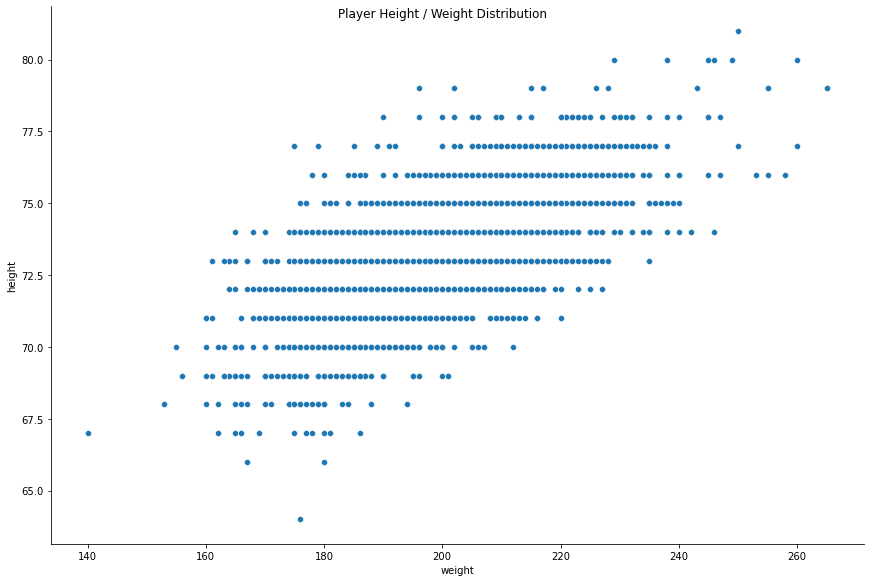

In [9]:
# Plotting the player height and weights on a scatter
g = sns.relplot(x='weight', y='height', data=playerinf, height=8, aspect=6/ 4)
g.fig.suptitle('Player Height / Weight Distribution')

In [10]:
# We can see a clear positive relationship between players' height and weight/
# The plot resembles a grid as player height and weight are recorded in whole numbers by the league.
# In reality, the heights and weights should vary ever so slightly from the recorded figures. I will add this with jitter, bringing in a random variation of 1lb to weight and 1inch to height.

import random # to allow use of random functions

playerinf['jitheight'] = (playerinf['height']).apply(lambda x: x + random.gauss(0, 1))
playerinf['jitweight'] = (playerinf['weight']).apply(lambda x: x + random.gauss(0, 1))

Text(0.5, 0.98, 'Jittered Player Height / Weight Distribution')

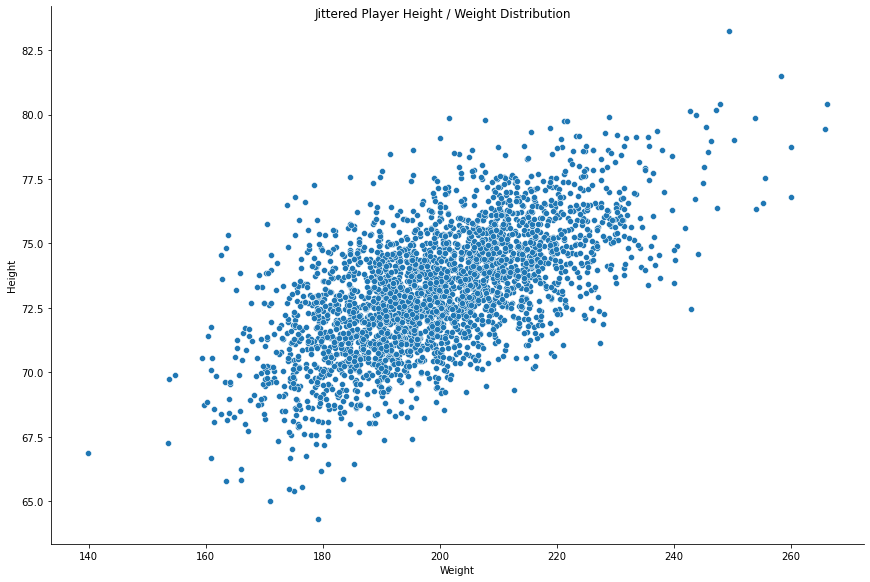

In [11]:
# We can see that NHL players are - by normal standards - tall and heavy. 
# Very few players who are shorter than 5'10 or lighther than 180lbs will make it to the NHL.

g = sns.relplot(x='jitweight', y='jitheight', data=playerinf, height=8, aspect=6/ 4)
g.set(xlabel = 'Weight', ylabel= 'Height')
g.fig.suptitle('Jittered Player Height / Weight Distribution')

Text(0.5, 0.98, 'Jittered Player Height / Weight Distribution by Player Position')

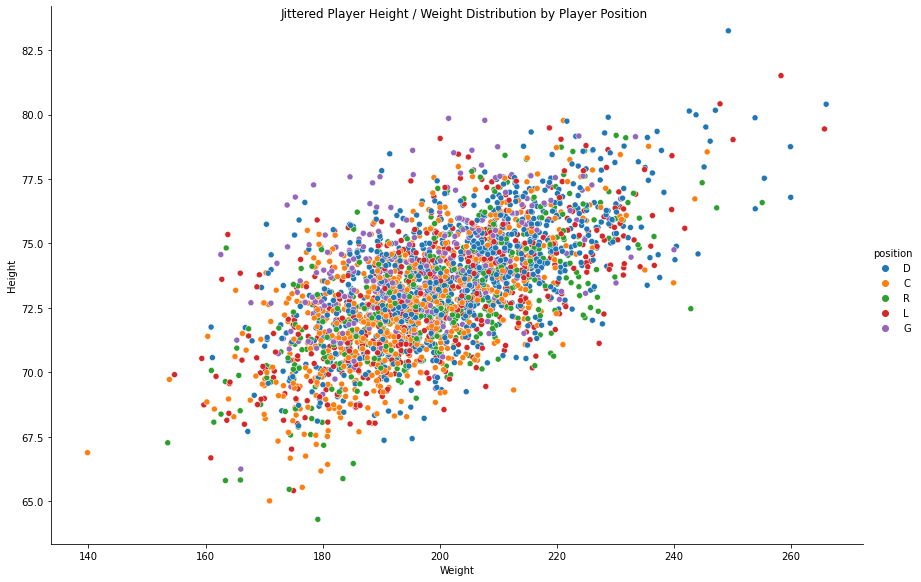

In [12]:
# I'll now look at adding player position to the plot to get a sense of whether certain positions tend to be taller or heavier

g = sns.relplot(x='jitweight', y='jitheight', hue='position', data=playerinf, height=8, aspect=6/ 4)
g.set(xlabel = 'Weight', ylabel= 'Height')
g.fig.suptitle('Jittered Player Height / Weight Distribution by Player Position')

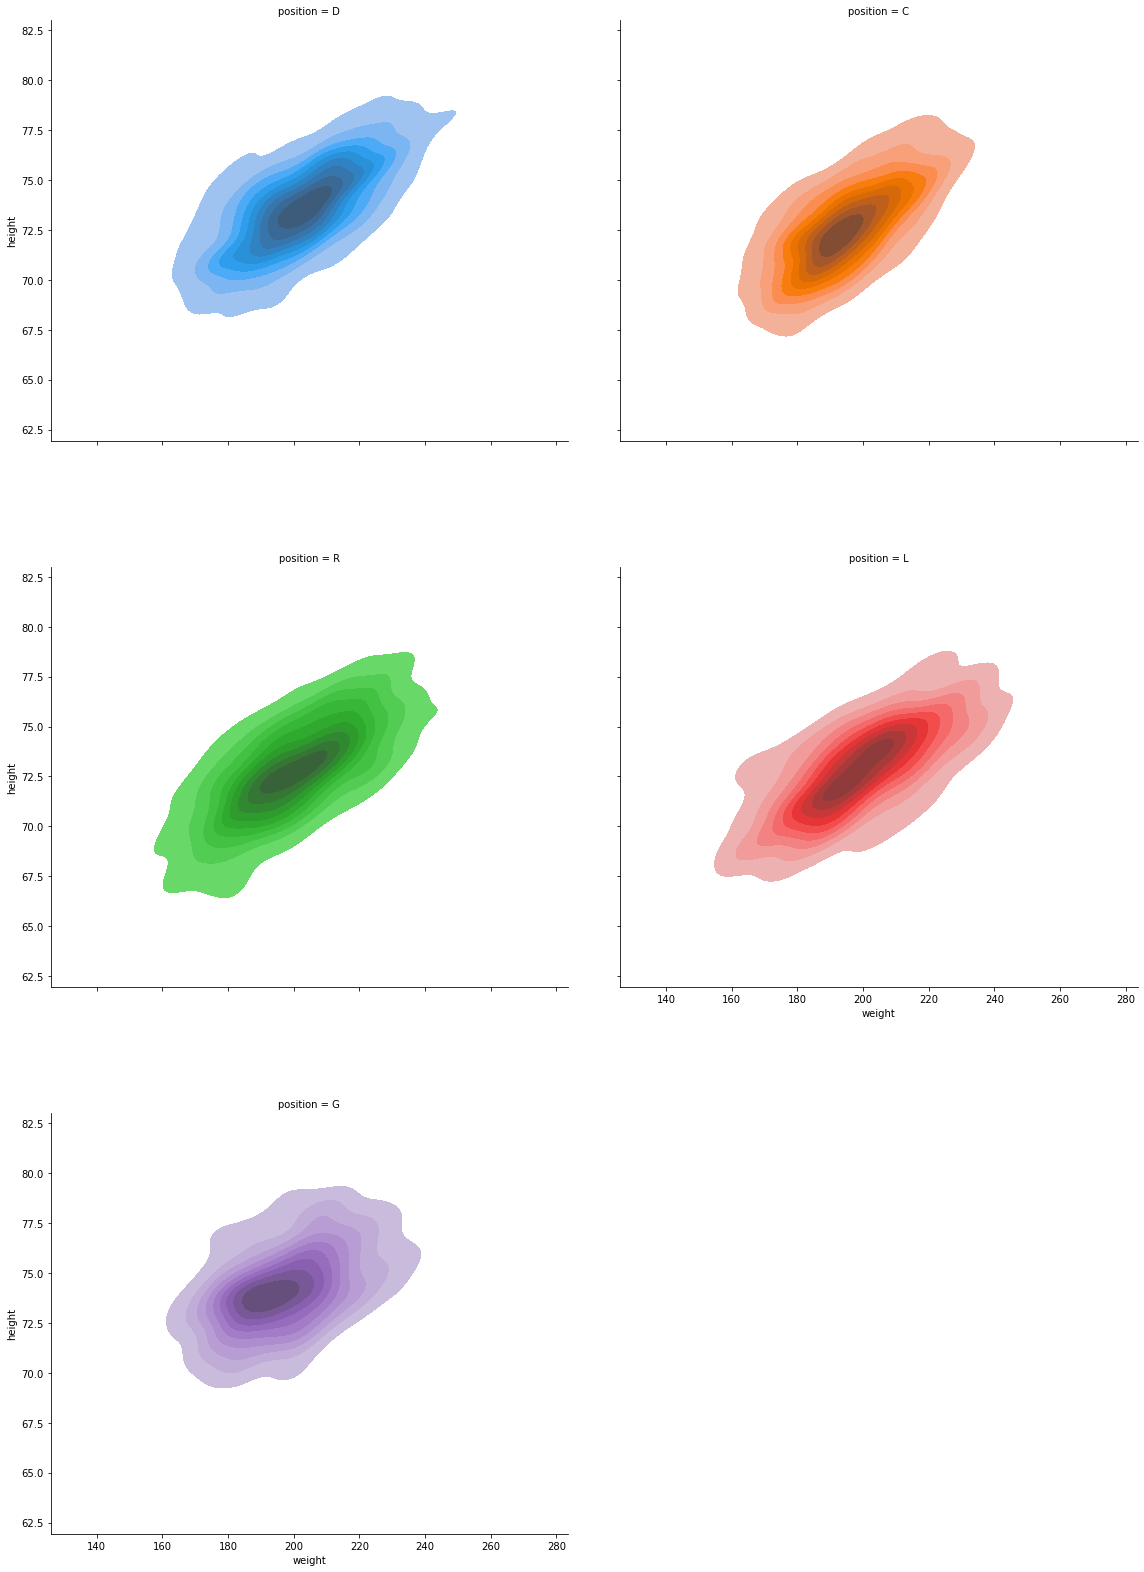

In [13]:
# By using a contour plot and assigning the hue to player position, I can get a better sense of the distribution
# Defenders tend to be taller and heavier than forwards
# Centers tend to be smaller and slightly lighter than the wingers (R & L) that they play with
# Goalies tend to be significantly taller than outfield players


g = (sns.FacetGrid(playerinf, col='position', hue='position', col_wrap=2, height = 8).map(sns.kdeplot, 'weight', 'height', shade=True))
g.fig.subplots_adjust(top=0.9, hspace=0.3, wspace=0.1)

In [14]:
# PLAYER SIZE VS PHYSICALITY - ANALYSIS & VISUALISATION

# I am also interested in whether "bigger" players are more physical. To investigate this, I will use player BMI as a proxy for
# size and determine the relationship between size and the number of hits a player makes.
# BMI formula for lbs and inches is weight(lb)/height(in)sq x 703
# First, I will create a new column in our playerinf dataframe for height squared

playerinf['height_sq'] = playerinf['height']**2

In [15]:
# Now I will add a column to calculate the player's BMI
playerinf['BMI'] = playerinf['weight']/playerinf['height_sq']*703
playerinf['BMI']

0       26.398367
1       26.541837
2       25.537551
3       22.237755
4       28.693878
          ...    
2853    27.351094
2854    25.154219
2855    26.142812
2856    27.021562
2857    26.787075
Name: BMI, Length: 2858, dtype: float64

In [16]:
# Now I will import a player stats dataset from Moneypuck.com, which contains information including the number of hits 
# players made in the 2021-2022 season.

playerstats = pd.read_csv('https://raw.githubusercontent.com/BeeryeIRE/UCDPA_brianconnolly/main/skaters.csv')
playerstats.dropna(inplace = True)
playerstats.sample(5)

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
586,8477426,2021,Nicholas Paul,TBL,L,all,80,79257,1746,34.07,...,196.78,189.50,3365,3385,0,0,0,0,0,0
729,8473563,2021,Nicklas Backstrom,WSH,C,all,47,49324,949,20.83,...,92.05,97.35,1797,1964,0,0,0,0,0,0
202,8477506,2021,Ryan Pulock,NYI,D,all,56,71014,1470,24.25,...,93.53,114.92,1883,2284,0,0,0,0,0,0
322,8479376,2021,Victor Mete,OTT,D,all,37,32466,759,3.58,...,85.15,91.57,1524,1660,0,0,0,0,0,0
214,8478414,2021,Timo Meier,SJS,R,all,77,88501,1759,84.59,...,116.18,161.86,2377,3415,0,0,0,0,0,0


In [17]:
# To eliminate variance in games played from the players' hit totals, I will add a column to calculate hits per game.

playerstats[['HPG']] = playerstats['I_F_hits']/playerstats['games_played']

In [18]:
# Setting index of playerinf and playerstats dataframes to playerID, so that I can concatenate the dataframes for my chart

playerinf.set_index('playerId', inplace=True)
playerstats.set_index('playerId', inplace=True)
playerhits = pd.concat([playerinf, playerstats], axis=1)
playerhits.head()

,name,position,team,birthDate,weight,height,nationality,shootsCatches,primaryNumber,primaryPosition,...,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts,HPG
playerId,,,,,,,,,,,,,,,,,,,,,
8445550,Rob Blake,D,S.J,12/10/1969,220.0,76.0,CAN,R,4.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8445735,Rod Brind'Amour,C,CAR,8/9/1970,205.0,73.0,CAN,L,17.0,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8445739,Patrice Brisebois,D,MTL,1/27/1971,197.0,74.0,CAN,R,71.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8446053,Chris Chelios,D,ATL,1/25/1962,191.0,72.0,USA,R,24.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8446485,Kris Draper,C,DET,5/24/1971,188.0,70.0,CAN,L,33.0,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0.98, 'Player BMI / Hit Distribution')

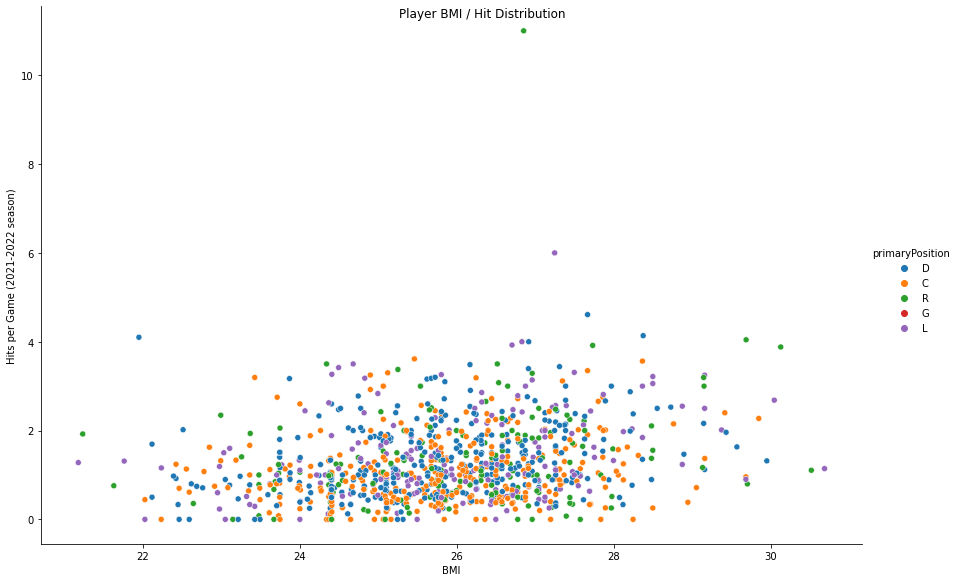

In [19]:
# Plotting the relationship between player BMI and hits using my calculated BMI and HPG columns. Adding position info as well.
# Despite what might be expected, we can see that there is little correlation between player size and the amount of hits they 
# make.

g = sns.relplot(x='BMI', y='HPG', hue='primaryPosition', data=playerhits, height=8, aspect=6/ 4)
g.set(xlabel = 'BMI', ylabel= 'Hits per Game (2021-2022 season)')
g.fig.suptitle('Player BMI / Hit Distribution')

In [20]:
# NHL SHOTS - DATA ANALYSIS AND VISUALISATION

# Having investigated the relationship between certain player attributes, I now want to also investigate the relationships between
# a number of attributes relating to shots taken in NHL games.

# I will beging by importing the relevant dataset.This is a csv containing data for all shots recorded during the 2021-2022 NHL 
# season. It was sourced from https://www.moneypuck.com/data.htm
# A supporting data dictionary has been uploaded to the github repository, but will not be imported here.

shots_df = pd.read_csv('https://raw.githubusercontent.com/BeeryeIRE/UCDPA_brianconnolly/main/shots_2021.csv')

In [21]:
shots_df.head()

,shotID,arenaAdjustedShotDistance,arenaAdjustedXCord,arenaAdjustedXCordABS,arenaAdjustedYCord,arenaAdjustedYCordAbs,averageRestDifference,awayEmptyNet,awayPenalty1Length,awayPenalty1TimeLeft,...,xCordAdjusted,xFroze,xGoal,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xRebound,xShotWasOnGoal,yCord,yCordAdjusted
0,0,42.520583,61.0,61.0,-32.0,32.0,-8.4,0,0,0,...,61,0.202514,0.009192,0.445979,0.289830,0.023891,0.028594,0.718082,-32,-32
1,1,30.610456,-65.0,65.0,19.0,19.0,21.4,0,0,0,...,65,0.285948,0.031353,0.303080,0.325607,0.026384,0.027629,0.793188,19,-19
2,2,85.381497,-8.0,8.0,-27.0,27.0,3.8,0,0,0,...,8,0.161225,0.012753,0.307661,0.486296,0.019218,0.012846,0.840122,-27,27
3,3,29.274562,-60.0,60.0,-4.0,4.0,0.0,0,0,0,...,60,0.161623,0.121753,0.374061,0.264891,0.024508,0.053163,0.729294,-4,4
4,4,26.305893,63.0,63.0,4.0,4.0,0.0,0,0,0,...,63,0.116379,0.088392,0.432747,0.284554,0.018850,0.059078,0.695010,4,4


In [22]:
# shotID is already a functionl index, so I will set it as such and drop the default index

shots_df.set_index('shotID', inplace=True) 

In [23]:
# There is far more information in this dataset than I require for this project
# I want to visualise shots to draw insights on how shot location and success is affected by other factors
# I'm interested in Shot Distance, Shot x and y Coordinates, Shot type, Shot outcome and the shooting player's position
# Therefore, I will slice the relevant columns into a new dataframe for analysis

shot_info = shots_df[['shotDistance', 'xCordAdjusted', 'yCordAdjusted','shotType', 'event', 'playerPositionThatDidEvent']]
shot_info.head()

,shotDistance,xCordAdjusted,yCordAdjusted,shotType,event,playerPositionThatDidEvent
shotID,,,,,,
0,42.520583,61,-32,WRIST,SHOT,C
1,30.610456,65,-19,WRIST,SHOT,L
2,85.381497,8,27,WRIST,SHOT,D
3,29.274562,60,4,WRIST,SHOT,L
4,26.305893,63,4,WRIST,SHOT,L


In [24]:
# These column names are not as clean or informative as they could be, so I will tidy them up.

shot_info_rename = shot_info.rename(columns={'event': 'Shot Outcome','playerPositionThatDidEvent': 'Shooter Position', 'xCordAdjusted': 'xCord', 'yCordAdjusted': 'yCord'})
shot_info_rename.head()

,shotDistance,xCord,yCord,shotType,Shot Outcome,Shooter Position
shotID,,,,,,
0,42.520583,61,-32,WRIST,SHOT,C
1,30.610456,65,-19,WRIST,SHOT,L
2,85.381497,8,27,WRIST,SHOT,D
3,29.274562,60,4,WRIST,SHOT,L
4,26.305893,63,4,WRIST,SHOT,L


In [25]:
# Cleaning the Data

# I will check the shot_info df for missing data. It is not expected to find significant missing data as this datset is highly curated by Moneypuck.com
# I will not check for duplicates as each shot recorded has already been assigned a unique ID. It is not expected that there is any duplication of shots, and many individual shotIDs might share the same information. Therefore, dropping duplicates could incorrectly reduce the dataset.

In [26]:
# checking for missing values
missing_values = shot_info_rename.isnull().sum()
missing_values.head()

shotDistance    0
xCord           0
yCord           0
shotType        5
Shot Outcome    0
dtype: int64

In [27]:
# Dropping the rows where the shotType is missing. Since the number of missing values is tiny in the context of the dataset, I will not attempt to fill them.
# However, if I were to do so, a bfill method might be appropriate - shot_info.fillna(method='bfill', axis=0).fillna(0)

shot_info_rename.dropna(inplace=True)


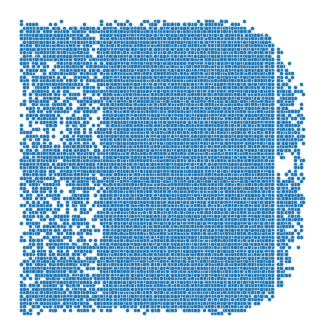

In [28]:
# Since I have both x and y coordinates for each shot, I can map them in a scatter plot
# The x value is the horizontal distance from the goal line and the y value is the vertical distance from centre-ice

shot_chart = sns.relplot(data=shot_info_rename, x='xCord', y='yCord', kind='scatter', s=15)
shot_chart.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
shot_chart.despine(left=True, bottom=True)


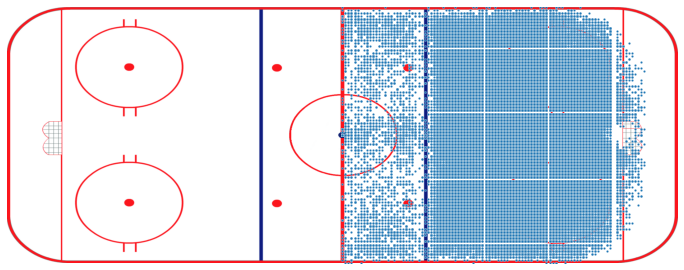

In [29]:
# This resembles a shot distribution nomralised so that all shots are made against the same goal. 
# Adding the ice-rink visual to make better sense of the shot distribution.

shot_chart = sns.relplot(data=shot_info_rename, x='xCord', y='yCord', kind='scatter', height=10, s=5)
shot_chart.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
shot_chart.despine(left=True, bottom=True)
for ax in shot_chart.fig.axes:
    ax.imshow(rink_img, zorder=0, extent=[-110, 110, -42, 42])

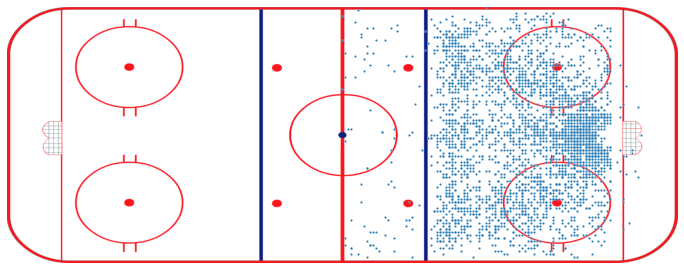

In [30]:
# It is difficult to make sense of the data with this visualisation as we are mapping c. 120,000 shots to a limited area. 
# Accordingly, almost all possible x and y coordinate pairs will be plotted.
# In order to make sense of the data, I will cut the shot sample size down to the first 3,500 shots from the shot_info_rename dataframe.

shot_info_reduced = shot_info_rename.iloc[0:3501, :]

shot_chart_reduced = sns.relplot(data=shot_info_reduced, x='xCord', y='yCord', kind='scatter', height=10, s=5)
shot_chart_reduced.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
shot_chart_reduced.despine(left=True, bottom=True)
for ax in shot_chart_reduced.fig.axes:
    ax.imshow(rink_img, zorder=0, extent=[-110, 110, -42, 42])


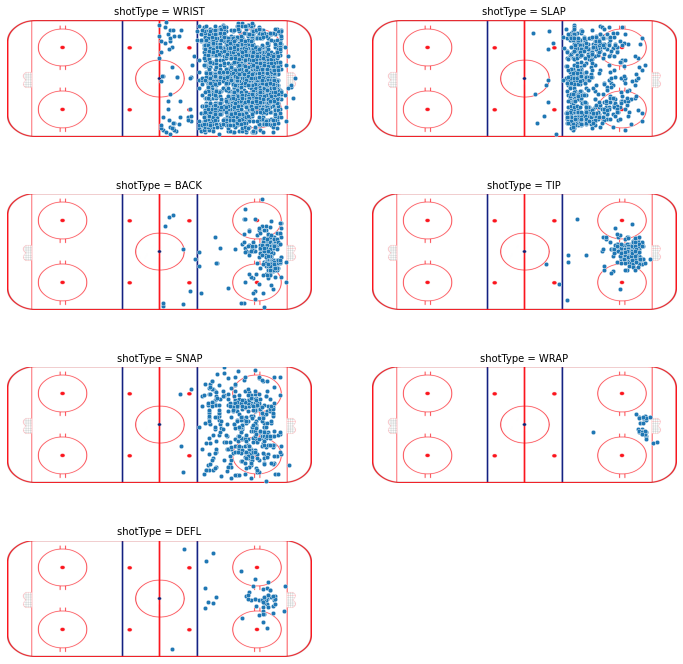

In [31]:
# We can see how each shot types are concentrated by position in the rink.

# Wrist shots are the most common shot type and players will attempt them from all parts of the rink.
# Slap shots tend to be taken from closer to the blue line.
# Backhand shots are typically taken much closer to the net as they do not have as much power as wrist or slap shots.
# Tipped shots are clustered between the faceoff circles right infront of the gaol mouth (the area known as "the slot").
# Snap shots - like wrist shots - are taken from all parts of the ice, but at a much lower frequency than wrist shots.
# Wraparound shots take place right in front of the goal. Due to the nature of this shot type - where the player skates the puck behind the net before "wrapping around" it to shoot - any Wraparound shots located beyond the area immediately in front of the goal are likely cases of misclassification by the official scorer.

shotType_chart = sns.relplot(data=shot_info_reduced,col = 'shotType',col_wrap=2, x='xCord', y='yCord', kind='scatter', height=5, s=20)
shotType_chart.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
shotType_chart.despine(left=True, bottom=True)
shotType_chart.fig.subplots_adjust(hspace=-0.8, wspace=0.2)
for ax in shotType_chart.fig.axes:
    ax.imshow(rink_img, zorder=0, extent=[-110, 110, -42, 42])

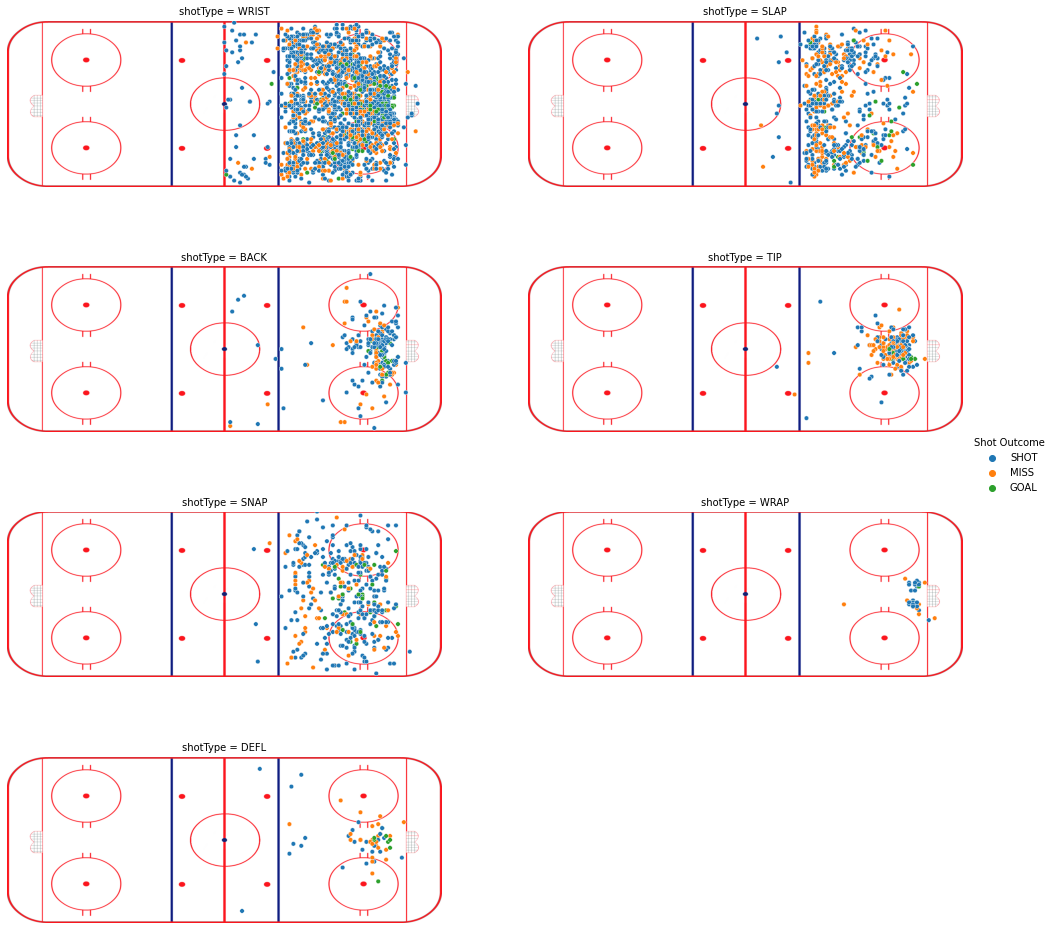

In [32]:
# Visualising the shot data by Shot Outcome - either a shot on goal, a miss or a goal
# We can see that players score more often by shooting from closer to the goal, regardless of the shot type

shotType_chart = sns.relplot(data=shot_info_reduced,col = 'shotType',hue='Shot Outcome' , col_wrap=2, x='xCord', y='yCord', kind='scatter', height=7, s=20)
shotType_chart.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
shotType_chart.despine(left=True, bottom=True)
shotType_chart.fig.subplots_adjust(hspace=-0.8, wspace=0.2)
for ax in shotType_chart.fig.axes:
    ax.imshow(rink_img, zorder=0, extent=[-110, 110, -42, 42])

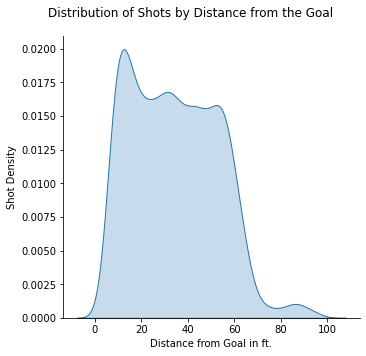

In [33]:
# Now I want to look at the density of shots by distance from the Goal
# When shot density is visualised, it is clear that the vast majority of shots are taken within 80 feet of the goal, and players have a preference to shoot from within 20 feet if possible.
# Note the x-axis starts from below zero - this is because the area behind the goal is still in play and some shots are made from behind the goal

g = sns.FacetGrid(shot_info_reduced, height = 5).map(sns.kdeplot, 'shotDistance', shade=True)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Shots by Distance from the Goal')
g.set(xlabel = 'Distance from Goal in ft.', ylabel= 'Shot Density')


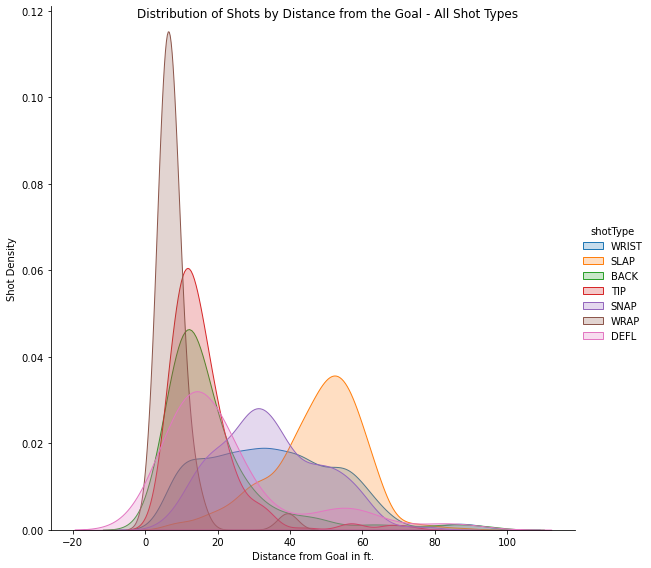

In [34]:
# By adding shot type information, we can see how players elect to take shots based on distance
# Wrap around shots are taken within 5 feet of the net by the nature of that shot
# Players attempt to Tip and Deflect shots from close to the goal - within 20 feet
# Players take backhand shots from closer to the goal (within 20ft) than wrist or snap shots, as the  backhand is a weaker shot
# Slap shots are more powerful, but players need to "wind up" this shot, which leaves them vulnerable to being disposessed of the puck. Players therefore take slap shots farther from the net where they are less likely to be disrupted.

g = sns.FacetGrid(shot_info_reduced, hue='shotType', height = 8).map(sns.kdeplot, 'shotDistance', shade=True)
g.fig.suptitle('Distribution of Shots by Distance from the Goal - All Shot Types')
g.set(xlabel = 'Distance from Goal in ft.', ylabel= 'Shot Density')
g.add_legend()

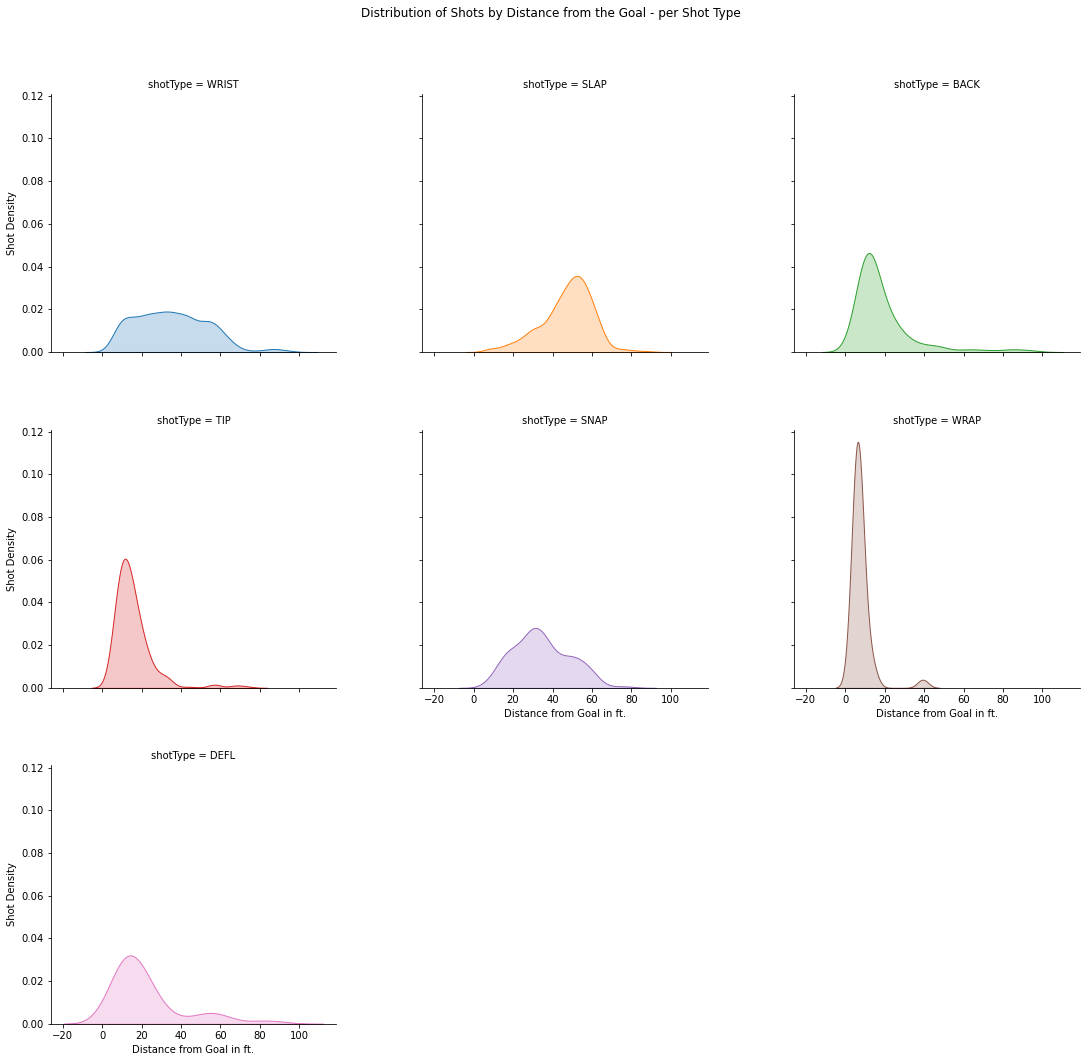

In [35]:
# Visualising density of each shot type individually for additional clarity.

g = (sns.FacetGrid(shot_info_reduced, col='shotType', hue='shotType', height=5, col_wrap=3).map(sns.kdeplot, 'shotDistance', shade=True))
g.fig.subplots_adjust(top=0.9, hspace=0.3, wspace=0.3)
g.fig.suptitle('Distribution of Shots by Distance from the Goal - per Shot Type')
g.set(xlabel = 'Distance from Goal in ft.', ylabel= 'Shot Density')

In [36]:
# LINEAR REGRESSION

# Having investigated the relationships between shot type, distance, location and outcome, I now want to run a linear regression
# model to see how shot distance correlates to goal probability.
# My model will suppose that goal probability will decrease as the shot distance increases
# For this model, I wll return to the shot_info dataframe, which contains data on all 120k+ shots from the 2021-2022 season.

In [37]:
shot_info.head()

,shotDistance,xCordAdjusted,yCordAdjusted,shotType,event,playerPositionThatDidEvent
shotID,,,,,,
0,42.520583,61,-32,WRIST,SHOT,C
1,30.610456,65,-19,WRIST,SHOT,L
2,85.381497,8,27,WRIST,SHOT,D
3,29.274562,60,4,WRIST,SHOT,L
4,26.305893,63,4,WRIST,SHOT,L


In [38]:
# In order to run a model, I will need:
# a single boolean column to distinguish shots that are goals from all other shots.
# the shotDistance
# the square of the shotDistance
# shotType


shot_info['Goal'] = shot_info['event'] == 'GOAL' # creating the boolean goal column 
shot_info['Goal'] = shot_info['Goal'].astype(int) # converting Goal column to an integer to allow it to act as the dummy variable for use in model
shot_info['shotDistance_sq'] = shot_info['shotDistance']**2 # creating column for square of shot distance
shot_info.drop('xCordAdjusted', axis=1, inplace=True) # dropping unnecessary column
shot_info.drop('yCordAdjusted', axis=1, inplace=True) # dropping unnecessary column
shot_info.drop('playerPositionThatDidEvent', axis=1, inplace=True) # dropping unnecessary column
shot_info.head()


,shotDistance,shotType,event,Goal,shotDistance_sq
shotID,,,,,
0,42.520583,WRIST,SHOT,0,1808.0
1,30.610456,WRIST,SHOT,0,937.0
2,85.381497,WRIST,SHOT,0,7290.0
3,29.274562,WRIST,SHOT,0,857.0
4,26.305893,WRIST,SHOT,0,692.0


In [39]:
# Filtering for all shotIDs that resulted in a Goal to check boolean is correct. 
#The value for 'Goal' is 1 where the value for 'event' is GOAL

shot_info.loc[shot_info['event'] == 'GOAL']

,shotDistance,shotType,event,Goal,shotDistance_sq
shotID,,,,,
27,17.492856,SNAP,GOAL,1,306.0
32,17.117243,WRIST,GOAL,1,293.0
70,47.010637,WRIST,GOAL,1,2210.0
76,14.035669,TIP,GOAL,1,197.0
77,29.529646,WRIST,GOAL,1,872.0
...,...,...,...,...,...
121370,39.623226,WRIST,GOAL,1,1570.0
121385,30.675723,WRIST,GOAL,1,941.0
4,10.049876,WRIST,GOAL,1,101.0


In [40]:
# Applying the linear regression model using the statsmodels Ordinary Least Squared function

model = smf.ols(formula='Goal ~ shotDistance + shotDistance_sq', data=shot_info)

In [41]:
# Fitting the model and displaying the summary.

results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.030     
Dependent Variable: Goal             AIC:                11702.2765
Date:               2022-11-22 20:17 BIC:                11731.3988
No. Observations:   121471           Log-Likelihood:     -5848.1   
Df Model:           2                F-statistic:        1887.     
Df Residuals:       121468           Prob (F-statistic): 0.00      
R-squared:          0.030            Scale:              0.064469  
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           0.1927   0.0024  79.4068 0.0000  0.1880  0.1975
shotDistance       -0.0056   0.0001 -39.4249 0.0000 -0.0059 -0.0053
shotDistance_sq     0.0000   0.0000  24.7984 0.0000  0.0000  0.0000
-------------------------------------------------------------------
Omnibus:             76797.227     Durbin-Watson:        2.012     
Prob(Omnibus):       0.000         Jarque-Bera (JB):     569874.326
Skew:                3.171         Prob(JB):             0.000     
Kurtosis:            11.507        Condition No.:        6874      
===================================================================
* The condition number is large (7e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [42]:
# shotDistance_sq value is rounded too low to see - so I will display it via results.params

results.params

Intercept          0.192728
shotDistance      -0.005583
shotDistance_sq    0.000045
dtype: float64

In [43]:
# With model fitting complete, I can now update my model formula to best fit the data using the results parameters

# Defining a function to predict the probability of a goal using the information from model fitting

def prob_of_goal(shotDistance):
    b0, b1, b2 = results.params # where b0 is the intercept, b1 is shotDistance and b0 is shotDistance_sq
    return (b0 + b1*shotDistance + b2*(shotDistance**2)) # I am squaring the shot distance as the effect of distance is not expected to be equal across all cases. Moving shot distance from 1ft to 5ft is expected to reduce the probability of scoring more than moving from 35ft to 40ft.

In [44]:
# Checking if our probability of a goal decreases when shot distance increases, as expected

prob_of_goal(5)

0.16593608151603767

In [45]:
prob_of_goal(10)

0.14138543248295282

In [46]:
prob_of_goal(20)

0.09900913586545479

In [47]:
# predicting the results for all shots in shot_info and comparing to the actual recorded outcome

shot_info['Goal_hat'] = results.predict(shot_info)

In [48]:
# Displaying calculated goal probability against the recorded outcome for a random sample of 10 shots in shot_info data frame

shot_info[['Goal', 'Goal_hat']].sample(10)

,Goal,Goal_hat
shotID,,
114531,0,0.050087
98716,0,0.026716
3001,0,0.084284
111219,0,0.020069
63553,0,0.045071
75073,0,0.038859
116222,0,0.032732
42236,0,0.106657
76053,0,0.026716


In [49]:
# LOGISTIC REGRESSION

# Applying a linear regression above is not best practice. The measured variable "Goal" is a true or false value. 
# Modelling the probability of this with OLS creates the possibility that the model returns a result that is
# outside the 0-1 range, and therefore invalid.

# I will address this by running a logistic regression instead of OLS

In [50]:
# Starting with shot_info data frame again

shot_info.head()

,shotDistance,shotType,event,Goal,shotDistance_sq,Goal_hat
shotID,,,,,,
0,42.520583,WRIST,SHOT,0,1808.0,0.036410
1,30.610456,WRIST,SHOT,0,937.0,0.063850
2,85.381497,WRIST,SHOT,0,7290.0,0.042910
3,29.274562,WRIST,SHOT,0,857.0,0.067722
4,26.305893,WRIST,SHOT,0,692.0,0.076897


In [51]:
# dropping the Goal_hat column from our linear regression

shot_info.drop('Goal_hat', axis=1, inplace=True)
shot_info.head()

,shotDistance,shotType,event,Goal,shotDistance_sq
shotID,,,,,
0,42.520583,WRIST,SHOT,0,1808.0
1,30.610456,WRIST,SHOT,0,937.0
2,85.381497,WRIST,SHOT,0,7290.0
3,29.274562,WRIST,SHOT,0,857.0
4,26.305893,WRIST,SHOT,0,692.0


In [52]:
# This time, I use statsmodels' logistc regression model

model_logistic = smf.logit(formula='Goal ~ shotDistance', data=shot_info)

In [53]:
# Model fitting and summary

results_logistic = model_logistic.fit()
results_logistic.summary2()

Optimization terminated successfully.
         Current function value: 0.243553
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.055     
Dependent Variable: Goal             AIC:              59173.2501
Date:               2022-11-22 20:17 BIC:              59192.6649
No. Observations:   121471           Log-Likelihood:   -29585.   
Df Model:           1                LL-Null:          -31309.   
Df Residuals:       121469           LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -1.4227   0.0211 -67.4470 0.0000 -1.4640 -1.3813
shotDistance     -0.0406   0.0008 -53.4524 0.0000 -0.0420 -0.0391
=================================================================

"""

In [54]:
# displaying params

results_logistic.params

Intercept      -1.422681
shotDistance   -0.040562
dtype: float64

In [55]:
# Defining a function to predict the probability of a goal using the information from model fitting

def prob_goal_logistic(shotDistance):
    b0, b1 = results_logistic.params # where b0 is intercept and b1 is shotDistance
    value = (b0 + b1*shotDistance)
    return 1/(1 + math.exp(-value))

In [56]:
prob_goal_logistic(5)

0.16444884943935284

In [57]:
prob_goal_logistic(15)

0.11597467076851235

In [58]:
prob_goal_logistic(40)

0.04542651411383013

In [59]:
# predicting the results for all shots in shot_info and comparing to the actual recorded outcome

shot_info['Goal_hat_logistic'] = results_logistic.predict(shot_info)

In [60]:
# Displaying calculated probability against the recorded outcome for a random sample of 10 shots in shot_info

shot_info[['Goal', 'Goal_hat_logistic']].sample(10)

,Goal,Goal_hat_logistic
shotID,,
11423,0,0.039026
81343,0,0.107798
55470,0,0.145933
5974,0,0.019117
66309,0,0.107913
59905,0,0.039997
8294,0,0.033682
86797,0,0.034920
43937,0,0.111755


In [61]:
# RANDOM FOREST MACHINE LEARNING MODEL

# As the final piece of this project, I will implement a Random Forest machine learning model to the shot data, using Scikit-learn.
# The aim of the model will be to predict what type of shot was taken based on a number of continous and categorical variables.

In [62]:
# For this model, I will use the full shots_df dataframe, which contains the full shot data for the 2021-2022 NHL season
# There are many continous and categorical variables to consider. I am selecting based on my personal guess as to which 
# variables would be most predictive.

# continuous variables: shot distance, shot coordinates, shot angle, the amount of time the shooter was on the ice without rest before they took the shot
# categorical variables: was the shot off the rush, did the shot generate a rebound, shooter position, shooter handedness, was the shooter on their off wing

In [63]:
shots_df.head()

,arenaAdjustedShotDistance,arenaAdjustedXCord,arenaAdjustedXCordABS,arenaAdjustedYCord,arenaAdjustedYCordAbs,averageRestDifference,awayEmptyNet,awayPenalty1Length,awayPenalty1TimeLeft,awaySkatersOnIce,...,xCordAdjusted,xFroze,xGoal,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xRebound,xShotWasOnGoal,yCord,yCordAdjusted
shotID,,,,,,,,,,,,,,,,,,,,,
0,42.520583,61.0,61.0,-32.0,32.0,-8.4,0,0,0,5,...,61,0.202514,0.009192,0.445979,0.289830,0.023891,0.028594,0.718082,-32,-32
1,30.610456,-65.0,65.0,19.0,19.0,21.4,0,0,0,5,...,65,0.285948,0.031353,0.303080,0.325607,0.026384,0.027629,0.793188,19,-19
2,85.381497,-8.0,8.0,-27.0,27.0,3.8,0,0,0,5,...,8,0.161225,0.012753,0.307661,0.486296,0.019218,0.012846,0.840122,-27,27
3,29.274562,-60.0,60.0,-4.0,4.0,0.0,0,0,0,5,...,60,0.161623,0.121753,0.374061,0.264891,0.024508,0.053163,0.729294,-4,4
4,26.305893,63.0,63.0,4.0,4.0,0.0,0,0,0,5,...,63,0.116379,0.088392,0.432747,0.284554,0.018850,0.059078,0.695010,4,4


In [64]:
# establishing my continuous variables from shots_df

cont_vars = ['shotDistance', 'xCordAdjusted', 'yCordAdjusted', 'shotAngleAdjusted', 'shooterTimeOnIceSinceFaceoff']

In [65]:
#establishing my categorical variables from shots_df

cat_vars = ['shotGeneratedRebound', 'shotRush', 'playerPositionThatDidEvent', 'shooterLeftRight', 'offWing']

In [66]:
# I need my categorical variables to be 1 or 0 to work in the model, therefore I will use "get_dummies" from pandas to populate
# them as 1 or 0.

vars_cat = pd.concat([pd.get_dummies(shots_df[x]) for x in cat_vars], axis = 1)
vars_cat.head(10)

,0,1,0,1,C,D,G,L,R,L,R,0,1
shotID,,,,,,,,,,,,,
0,1,0,1,0,1,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,0,1,0,1,0,0,1
2,1,0,1,0,0,1,0,0,0,0,1,0,1
3,1,0,1,0,0,0,0,1,0,1,0,1,0
4,1,0,1,0,0,0,0,1,0,1,0,1,0
5,1,0,1,0,0,1,0,0,0,0,1,0,1
6,1,0,1,0,1,0,0,0,0,1,0,1,0
7,1,0,1,0,0,1,0,0,0,1,0,1,0
8,1,0,0,1,0,0,0,0,1,0,1,0,1


In [67]:
# concatenating the continuous and categorical variables into a new dataframe

vars_combined = pd.concat([shots_df[cont_vars], vars_cat], axis = 1)
vars_combined['shotType'] = shots_df['shotType']
vars_combined.sample(10)

,shotDistance,xCordAdjusted,yCordAdjusted,shotAngleAdjusted,shooterTimeOnIceSinceFaceoff,0,1,0,1,C,D,G,L,R,L,R,0,1,shotType
shotID,,,,,,,,,,,,,,,,,,,
14651,48.332184,45,20,24.443955,31,1,0,1,0,1,0,0,0,0,1,0,1,0,WRIST
120372,12.369317,86,12,75.963757,30,0,1,1,0,0,0,0,1,0,1,0,1,0,WRIST
24395,45.276926,50,23,30.529706,13,0,1,1,0,1,0,0,0,0,0,1,0,1,WRIST
97627,53.712196,42,-26,28.950995,39,1,0,1,0,0,0,0,0,1,0,1,1,0,SLAP
93161,25.495098,84,-25,78.690068,32,1,0,1,0,0,1,0,0,0,1,0,0,1,BACK
16675,17.029386,88,17,86.633539,35,1,0,1,0,1,0,0,0,0,1,0,1,0,WRIST
38950,60.901560,36,-30,29.511499,7,0,1,1,0,0,1,0,0,0,0,1,1,0,WRIST
68195,69.634761,21,-15,12.439562,74,1,0,1,0,0,0,0,1,0,1,0,0,1,WRIST
78478,64.412732,32,-30,27.758541,12,1,0,1,0,0,1,0,0,0,0,1,1,0,WRIST


In [68]:
# we know there are null values for shotType as seen earlier in this project

null_values = vars_combined.isnull().sum()
null_values.head(19)

shotDistance                    0
xCordAdjusted                   0
yCordAdjusted                   0
shotAngleAdjusted               0
shooterTimeOnIceSinceFaceoff    0
0                               0
1                               0
0                               0
1                               0
C                               0
D                               0
G                               0
L                               0
R                               0
L                               0
R                               0
0                               0
1                               0
shotType                        5
dtype: int64

In [69]:
# Dropping null values

vars_combined.dropna(inplace=True)

In [70]:
# setting up the variables. The x variables (i.e. continuous and categorical) will be used topredict the y variable (shot type)

yvar = 'shotType'
xvars = cont_vars + list(vars_cat.columns)

In [71]:
# I will now train the model using Scikit-Learn's "train_test_split function"
# I am assigning a holdout set of 33% of data.

train, test = skms.train_test_split(vars_combined, test_size=0.33)

In [72]:
# Executing the Scikit_Learn Random Forest Classifer (i.e. categorical) model, using 100 trees to build the model.

forest_model = sken.RandomForestClassifier(n_estimators=100)
forest_model.fit(train[xvars], train[yvar])

RandomForestClassifier()

In [73]:
# The Random Forest function does not output visual results. To test, I will assign a new column to record the value of the
# "forest_model.predict" function.

test['shotType_hat'] = forest_model.predict(test[xvars])

In [74]:
# Then I define what a correct guess looks like - i.e. the predicted shotType matches the original shotType

test ['correct'] = (test['shotType_hat']) == test['shotType']

In [75]:
# Finally, by finding the mean of the correct values (1 or 0), I can see how predictive my model is. In this case, the model
# predicts accurately c. 47% of the time (this will change on each execution due to the random nature of the model)

test['correct'].mean()

0.4701127631972857

In [76]:
# To get a better sense of how the model has performed, I will generate a dataframe showing the prediction percentage for each
# shot type against each shotID

Prob_table = pd.DataFrame(forest_model.predict_proba(test[xvars]),
index=test.index,
columns=forest_model.classes_)
Prob_table.head(10)

,BACK,DEFL,SLAP,SNAP,TIP,WRAP,WRIST
shotID,,,,,,,
899,0.34,0.020000,0.01,0.09000,0.010000,0.0,0.530000
13674,0.07,0.030000,0.02,0.03000,0.020000,0.0,0.830000
50269,0.00,0.010000,0.00,0.18000,0.000000,0.0,0.810000
114363,0.05,0.090000,0.00,0.01000,0.199167,0.0,0.650833
104174,0.02,0.000000,0.44,0.21000,0.020000,0.0,0.310000
92055,0.02,0.017619,0.00,0.03869,0.653690,0.0,0.270000
14887,0.00,0.000000,0.16,0.04000,0.010000,0.0,0.790000
111658,0.02,0.690000,0.00,0.00000,0.010000,0.0,0.280000
11679,0.07,0.000000,0.17,0.08000,0.000000,0.0,0.680000


In [77]:
# Adding in the orignal shotType, shotType prediction and prediction result to give more context.

Prob_results = pd.concat([test[['shotType','shotType_hat','correct']],Prob_table], axis=1)
Prob_results.head(10)

,shotType,shotType_hat,correct,BACK,DEFL,SLAP,SNAP,TIP,WRAP,WRIST
shotID,,,,,,,,,,
899,WRIST,WRIST,True,0.34,0.020000,0.01,0.09000,0.010000,0.0,0.530000
13674,WRIST,WRIST,True,0.07,0.030000,0.02,0.03000,0.020000,0.0,0.830000
50269,WRIST,WRIST,True,0.00,0.010000,0.00,0.18000,0.000000,0.0,0.810000
114363,TIP,WRIST,False,0.05,0.090000,0.00,0.01000,0.199167,0.0,0.650833
104174,WRIST,SLAP,False,0.02,0.000000,0.44,0.21000,0.020000,0.0,0.310000
92055,WRIST,TIP,False,0.02,0.017619,0.00,0.03869,0.653690,0.0,0.270000
14887,SNAP,WRIST,False,0.00,0.000000,0.16,0.04000,0.010000,0.0,0.790000
111658,BACK,DEFL,False,0.02,0.690000,0.00,0.00000,0.010000,0.0,0.280000
11679,SLAP,WRIST,False,0.07,0.000000,0.17,0.08000,0.000000,0.0,0.680000


In [78]:
# Finally, using .groupby to see how the model predicted each shot type against each other.
# This shows some interesting results

# (i) The model highly overpredicts all shots as wrist shots. This is likely due to wrist shots being so much more common than 
# all other shot types.

# (ii) The model is relatively better at predicting slapshots, suggesting that shot distance/shot coordinates are an important 
# feature in the model

# (iii) The model is very poor at predicting deflections, but it often mispredicts deflections as tip-ins, which is a very 
# similar type of shot that shares many characteristics with deflections.

Prob_results.groupby('shotType')[['correct', 'WRIST','SNAP','SLAP','BACK','DEFL','TIP','WRAP']].mean().round(2)

,correct,WRIST,SNAP,SLAP,BACK,DEFL,TIP,WRAP
shotType,,,,,,,,
BACK,0.17,0.48,0.09,0.04,0.19,0.05,0.13,0.02
DEFL,0.04,0.47,0.10,0.03,0.13,0.06,0.20,0.01
SLAP,0.25,0.55,0.13,0.28,0.02,0.01,0.01,0.00
SNAP,0.09,0.59,0.15,0.14,0.05,0.02,0.04,0.00
TIP,0.21,0.44,0.09,0.02,0.14,0.07,0.22,0.01
WRAP,0.21,0.41,0.05,0.01,0.21,0.03,0.08,0.22
WRIST,0.71,0.58,0.14,0.13,0.06,0.02,0.06,0.01


In [79]:
# CROSS VALIDATION

# As the final piece of this project, I will apply cross validation to the Random Forest model. This is intended to offset the
# randomness of indiviudal holdout sdets by applying the model to multiple holdout sets. I am using cv=10 as a reasonable
# balance between enhanced accuracy and processing time.

# In this case cross validation appears to have a small positive effect on the model's predictiveness.

forest_model_CV = sken.RandomForestClassifier(n_estimators=100)
fmcv_scores = skms.cross_val_score(forest_model_CV, train[xvars], train[yvar], cv=10)
fmcv_scores.mean()

0.473028510739202